## Muhammad Umer Adeeb

### Question 4: Kaggle Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [4]:
df.shape

(303, 15)

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [6]:
df.dtypes


,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [7]:
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zeros in {col}: {zero_count}")


Number of zeros in Unnamed: 0: 0
Number of zeros in Age: 0
Number of zeros in Sex: 97
Number of zeros in ChestPain: 0
Number of zeros in RestBP: 0
Number of zeros in Chol: 0
Number of zeros in Fbs: 258
Number of zeros in RestECG: 151
Number of zeros in MaxHR: 0
Number of zeros in ExAng: 204
Number of zeros in Oldpeak: 99
Number of zeros in Slope: 0
Number of zeros in Ca: 176
Number of zeros in Thal: 0
Number of zeros in AHD: 0


In [8]:
df['Age'].mean()

54.43894389438944

In [9]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [10]:
#Now extract only Age, Sex, ChestPain, RestBP, Chol.
df.drop(columns=['Unnamed: 0', 'Fbs','RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'], inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,AHD
0,63,1,typical,145,233,No
1,67,1,asymptomatic,160,286,Yes
2,67,1,asymptomatic,120,229,Yes
3,37,1,nonanginal,130,250,No
4,41,0,nontypical,130,204,No


In [11]:
x = df.drop(columns=['AHD'])
y= df['AHD']
display(x.head())
display(y.head())

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204


,AHD
0,No
1,Yes
2,Yes
3,No
4,No


In [12]:
y.replace({'Yes': 1, 'No': 0}, inplace=True)
display(y.head())

<ipython-input-12-a8acbb79871c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'Yes': 1, 'No': 0}, inplace=True)


,AHD
0,0
1,1
2,1
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=90)
print(x_train.shape)
display(x_train.head())
print(x_test.shape)
display(x_test.head())
print(y_train.shape)
display(y_train.head())
print(y_test.shape)
display(y_test.head)

(227, 5)


,Age,Sex,ChestPain,RestBP,Chol
209,62,0,asymptomatic,150,244
183,59,1,typical,178,270
165,57,1,asymptomatic,132,207
41,40,1,typical,140,199
291,55,0,nontypical,132,342


(76, 5)


,Age,Sex,ChestPain,RestBP,Chol
288,56,1,nontypical,130,221
223,53,1,asymptomatic,123,282
264,61,1,asymptomatic,138,166
96,59,1,asymptomatic,110,239
219,59,1,asymptomatic,138,271


(227,)


,AHD
209,1
183,0
165,0
41,0
291,0


(76,)


<bound method NDFrame.head of 288    0
223    1
264    1
96     1
219    0
      ..
55     1
79     1
217    0
287    0
188    1
Name: AHD, Length: 76, dtype: int64>

In [14]:
x_train['ChestPain'].unique()

array(['asymptomatic', 'typical', 'nontypical', 'nonanginal'],
      dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['typical', 'asymptomatic', 'nonanginal', 'nontypical']])
x_train['ChestPain'] = ordinal_encoder.fit_transform(x_train[['ChestPain']])
x_test['ChestPain'] = ordinal_encoder.transform(x_test[['ChestPain']])
print(x_train.head())
print(x_test.head())


     Age  Sex  ChestPain  RestBP  Chol
209   62    0        1.0     150   244
183   59    1        0.0     178   270
165   57    1        1.0     132   207
41    40    1        0.0     140   199
291   55    0        3.0     132   342
     Age  Sex  ChestPain  RestBP  Chol
288   56    1        3.0     130   221
223   53    1        1.0     123   282
264   61    1        1.0     138   166
96    59    1        1.0     110   239
219   59    1        1.0     138   271


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['Age', 'RestBP', 'Chol']] = scaler.fit_transform(x_train[['Age', 'RestBP', 'Chol']])
x_test[['Age', 'RestBP', 'Chol']] = scaler.transform(x_test[['Age', 'RestBP', 'Chol']])

print(x_train.head())
print(x_test.head())

          Age  Sex  ChestPain    RestBP      Chol
209  0.834084    0        1.0  1.014683 -0.025148
183  0.508203    1        0.0  2.627015  0.469594
165  0.290948    1        1.0 -0.021816 -0.729203
41  -1.555713    1        0.0  0.438850 -0.881431
291  0.073694    0        3.0 -0.021816  1.839647
          Age  Sex  ChestPain    RestBP      Chol
288  0.182321    1        3.0 -0.136982 -0.462804
223 -0.143560    1        1.0 -0.540065  0.697936
264  0.725457    1        1.0  0.323684 -1.509372
96   0.508203    1        1.0 -1.288648 -0.120290
219  0.508203    1        1.0  0.323684  0.488622


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [19]:
pd.DataFrame({'y_test':y_test, 'y_predict':y_pred})

,y_test,y_predict
288,0,0
223,1,1
264,1,1
96,1,1
219,0,1
...,...,...
55,1,1
79,1,1
217,0,0
287,0,0


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification Report:\n ', classification_report(y_test, y_pred))

Accuracy Score:  0.75
Precision Score:  0.7428571428571429
Recall Score:  0.7222222222222222
F1 Score:  0.7323943661971831
Confusion Matrix:
  [[31  9]
 [10 26]]
Classification Report:
                precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.74      0.72      0.73        36

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



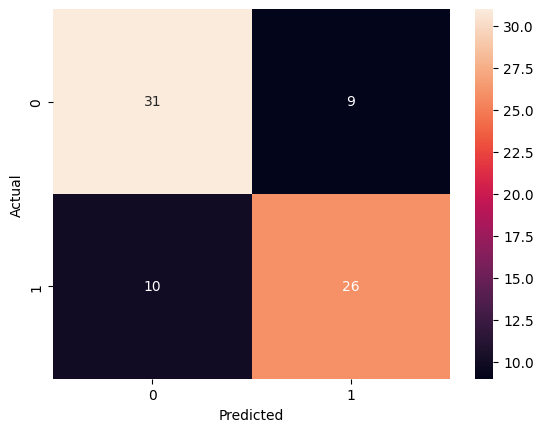

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()